<a href="https://colab.research.google.com/github/nkr9/Data-Analyst/blob/main/Probability_Distributions_and_Hypothesis_Tests_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.1 Binomial distribution.


1. Probability that exactly 5 customers will return the items.
The function stats.binom.pmf() calculates PMF for binomial distribution and takes three parameters:
(a) Expected number of successful trials (5)
(b) Total number of trials (20)
(c) The probability of success (0.1)
Note: The values in the bracket indicate the value of the parameters.

In [ ]:
from scipy import stats
stats.binom.pmf(5, 20, 0.1)


np.float64(0.031921361119954424)

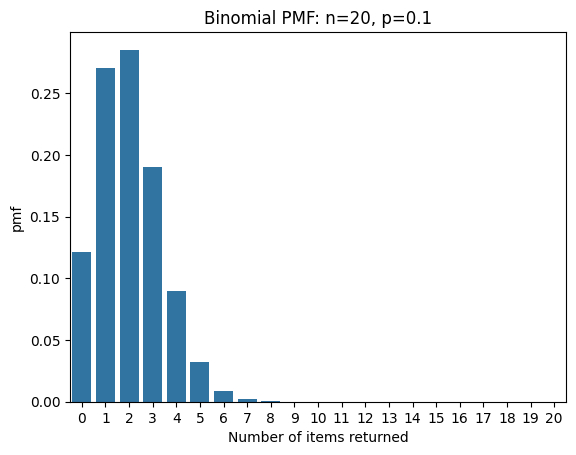

In [2]:
import pandas as pd
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt

# Create PMF data
pmf_df = pd.DataFrame({
    'success': range(0, 21),
    'pmf': list(stats.binom.pmf(range(0, 21), 20, 0.1))
})

# Creating a bar plot
sn.barplot(x=pmf_df.success, y=pmf_df.pmf)
plt.xlabel('Number of items returned')
plt.ylabel('pmf')
plt.title('Binomial PMF: n=20, p=0.1')
plt.show()


2. Probability that a maximum of 5 customers will return the items.

The class stats.binom.cdf() computes the CDF for binomial distribution. In this case the cumulative distribution function returns the probability that a maximum of 5 customers will return items.

In [ ]:
stats.binom.cdf(5, 20, 0.1)


np.float64(0.988746865835491)

The corresponding probability value is 0.9887.

3. Probability that more than 5 customers will return the items purchased by them.

Total probability of any number of customers returning items (including 0) is always equal to 1.0. So, the
probability that more than 5 customers will return the items can be computed by subtracting the probability
of a maximum of 5 customers will return items from 1.0. In other words, the probability that more than 5
customers will return the items can be obtained by computing CDF of 5 and then subtracting it from 1.0.

In [ ]:
1 - stats.binom.cdf(5, 20, 0.1)


np.float64(0.011253134164509015)

The corresponding probability value is 0.0112

4. Average number of customers who are likely to return the items and the variance and the standard deviation of the number of returns.

(a) Average of a binomial distribution is given by n * p

(b) Variance of the binomial distribution is given by n * p * (1 − p)


In [ ]:
from scipy import stats

mean, var = stats.binom.stats(20, 0.1)
print("Average:", mean, "Variance:", var)


Average: 2.0 Variance: 1.8


3.5 | POISSON DISTRIBUTION

3.5.1 | Example of Poisson Distribution
The number of calls arriving at a call center follows a Poisson distribution at 10 calls per hour.
1. Calculate the probability that the number of calls will be maximum 5.
2. Calculate the probability that the number of calls over a 3-hour period will exceed 30

1. Calculate the probability that a maximum of 5 calls will arrive at the call center. As the number of calls arriving at the center follows Poisson distribution, we can use stats.poisson.cdf to

calculate the probability value. It takes the following two parameters:

(a) First parameter: Number of events (in this case, 5 calls) for which the probability needs to be calculated.

(b) Second parameter: The average numbers of events (i.e., 10 calls per hour)

In [ ]:
stats.poisson.cdf(5, 10)


np.float64(0.06708596287903189)

The corresponding probability is 0.067.

2. Calculate the probability that the number of calls over a 3-hour period will exceed 30.


In [ ]:
1 - stats.poisson.cdf(30, 30)


np.float64(0.45164848742208863)

The corresponding probability is 0.451.


To visualize the Poisson distribution for the average calls per hour as 10, we can plot PMF for all possible number of calls the call center can receive ranging from 0 to 30. We will create a DataFrame which will contain the number of calls ranging from 0 to 30 in one column named success and the corresponding PMFs in another column named pmf. The plotting is done using barplot in seaborn library.

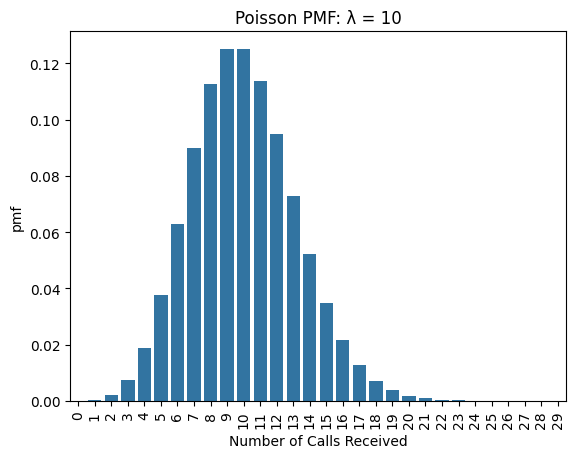

In [ ]:
# Poisson distribution PMF with lambda = 10
pmf_df = pd.DataFrame({
    'success': range(0, 30),
    'pmf': list(stats.poisson.pmf(range(0, 30), 10))
})

# Creating a bar plot
sn.barplot(x=pmf_df.success, y=pmf_df.pmf)
plt.xlabel('Number of Calls Received')
plt.ylabel('pmf')
plt.title('Poisson PMF: λ = 10')
plt.xticks(rotation=90)  # Optional: rotate x-axis labels for better readability
plt.show()

3.6 | EXPONENTIAL DISTRIBUTION


| Example of Exponential Distribution
The time-to-failure of an avionic system follows an exponential distribution with a mean time between
failures (MTBF) of 1000 hours. Calculate
1. The probability that the system will fail before 1000 hours.
2. The probability that it will not fail up to 2000 hours.
3. The time by which 10% of the system will fail (i.e., calculate P10 life).

We solve each of these as follows: Since time-to-failure is 1000 hours, so l is 1/1000

1. Calculate the probability that the system will fail before 1000 hours.
Cumulative distribution up to value 1000 for the exponential distribution will give the probability that the system will fail before 1000 hours. stats.expon.cdf() takes the number of hours and mean and scale of the exponential distribution as parameters to calculate CDF.

In [ ]:
stats.expon.cdf(1000, loc = 1/1000, scale = 1000)

np.float64(0.6321201909489326)

The corresponding probability value is 0.6321.

2. Calculate the probability that it will not fail up to 2000 hours. Probability that the system will not fail up to 2000 hours is same as the probability that the system will fail only beyond 2000 hours. This can be obtained by subtracting the probability that the system will fail up to 2000 hours from total probability (i.e. 1.0)

In [ ]:
1 - stats.expon.cdf(2000, loc = 1/1000, scale = 1000)

np.float64(0.13533541857196352)

The corresponding probability value 0.1353.


3. Calculate the time by which 10% of the system will fail (i.e., calculate P10 life).

This can be calculated by ppf (percent point function) and is an inverse of CDF. stats.expon.ppf takes the percent point value and the mean and scale of the exponential distribution.

In [ ]:
stats.expon.ppf(.1, loc = 1/1000, scale = 1000)

np.float64(105.36151565782632)

That is, by 105.36 hours, 10% of systems will fail.

We can visualize the exponential distribution by plotting the PDF function against different timeto-failure hours. We will create a list of time-to-failure ranging from 100 to 5000 and then calculate and
plot the PDF against those.

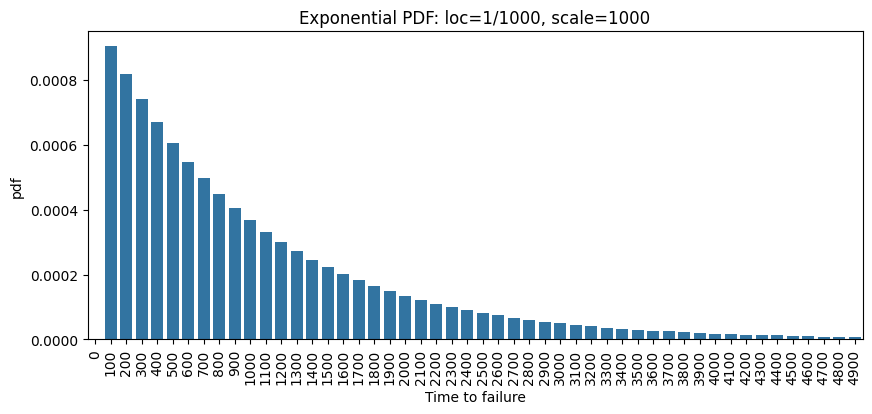

In [ ]:
# Exponential distribution PDF
pdf_df = pd.DataFrame({
    'success': range(0, 5000, 100),
    'pdf': list(stats.expon.pdf(range(0, 5000, 100), loc=1/1000, scale=1000))
})

# Plotting
plt.figure(figsize=(10, 4))
sn.barplot(x=pdf_df.success, y=pdf_df.pdf)
plt.xlabel('Time to failure')
plt.ylabel('pdf')
plt.title('Exponential PDF: loc=1/1000, scale=1000')
plt.xticks(rotation=90)
plt.show()

3.7 | NORMAL DISTRIBUTION

3.7.1 | Example of Normal Distribution
To understand normal distribution and its application, we will use daily returns of stocks traded in BSE (Bombay Stock Exchange). Imagine a scenario where an investor wants to understand the risks and returns associated with various stocks before investing in them. For this analysis, we will evaluate two
stocks: BEML and GLAXO. The daily trading data (open and close price) for each stock is taken for the period starting from 2010 to 2016 from BSE site (www.bseindia.com).
First, we will load and prepare the data before getting back to the application of normal distribution

In [ ]:
beml_df = pd.read_csv('/BEML_2010_2016_Full.csv')
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-01,1050.58,1055.83,1040.68,1053.53,1052.63,122349,1287.88
1,2010-01-04,1077.74,1081.77,1075.94,1078.37,1077.71,115306,1242.66
2,2010-01-05,1076.21,1084.22,1065.47,1074.79,1075.61,152541,1640.74
3,2010-01-06,1063.12,1067.76,1061.73,1064.34,1063.87,132855,1413.40
4,2010-01-07,1092.60,1093.98,1080.58,1092.49,1089.71,193682,2110.58


In [ ]:
glaxo_df = pd.read_csv('/GLAXO_2010_2016_Full.csv')
glaxo_df[0:5]


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-01,2377.08,2379.77,2353.13,2372.18,2374.26,53374,1267.24
1,2010-01-04,2446.94,2469.51,2429.96,2446.22,2443.81,81086,1981.59
2,2010-01-05,2417.10,2439.15,2402.24,2418.85,2422.33,187235,4535.44
3,2010-01-06,2397.84,2410.53,2377.95,2390.91,2390.66,77403,1850.44
4,2010-01-07,2362.91,2377.55,2354.20,2363.20,2361.64,56198,1327.20


The dataset contains daily Open and Close price along with daily High and Low prices, Total Trade Quantity, and Turnover (Lacs). Our discussion will involve only close price. The daily returns of a stock are calculated as the change in close prices with respect to the close price of yesterday.

Since our analysis will involve only daily close prices, so we will select Date and Close columns from the DataFrames.

In [ ]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

Visualizing the daily close prices will show how stock prices have moved over time. To show the trend of close price, the rows should be ordered by time. The DataFrames have a date column, so we can create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.

In [ ]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

Let us display the first 5 records after the DataFrame is sorted by time to ensure that it is done correctly.

In [ ]:
glaxo_df.head(5)

,Date,Close
Date,,
2010-01-01,2010-01-01,2374.26
2010-01-04,2010-01-04,2443.81
2010-01-05,2010-01-05,2422.33
2010-01-06,2010-01-06,2390.66
2010-01-07,2010-01-07,2361.64


Now plot the trend of close prices of GLAXO stock using plot() method of matplotlib, which takes glaxo_df.Close as a parameter.

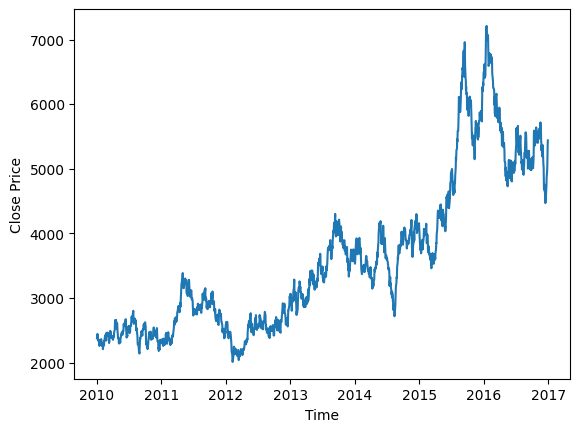

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

FIGURE 3.4 Close price trends of GLAXO stock.

Now plot BEML stock close price trend

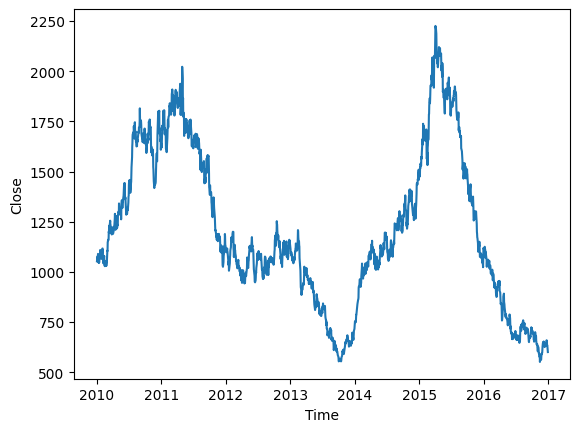

In [ ]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

FIGURE 3.5 Close price trends of BEML stock.

It can be observed that there is an upward trend in the close price of Glaxo during 2010−2017 period.
However, BEML had a downward trend during 2010−2013, followed by an upward trend since 2014 and then again a price correction from mid of 2015 (Figure 3.5).
What if a short-term (intraday) investor is interested in understanding the following characteristics
about these stocks:

1. What is the expected daily rate of return of these stocks?
2. Which stocks have higher risk or volatility as far as daily returns are concerned?
3. What is the expected range of return for 95% confidence interval?
4. Which stock has higher probability of making a daily return of 2% or more?
5. Which stock has higher probability of making a loss (risk) of 2% or more?

To answer the above questions, we must find out the behavior of daily returns (we will refer to this as gain hence forward) on these stocks. The gain can be calculated as a percentage change in close price, from the previous day’s close price.

gain= ClosePrice i ClosePrice t-1 / ClosePrice t-1

The method pct_change() in Pandas will give the percentage change in a column value shifted by a period, which is passed as a parameter to periods. periods = 1 indicates the value change since last row, that is, the previous day

In [ ]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)
glaxo_df.head(5)

,Date,Close,gain
Date,,,
2010-01-01,2010-01-01,2374.26,NaN
2010-01-04,2010-01-04,2443.81,0.029293
2010-01-05,2010-01-05,2422.33,-0.008790
2010-01-06,2010-01-06,2390.66,-0.013074
2010-01-07,2010-01-07,2361.64,-0.012139


The first day gain is shown as NAN, as there is no previous day for it to calculate gain. We can drop this record using the dropna() method.

In [ ]:
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

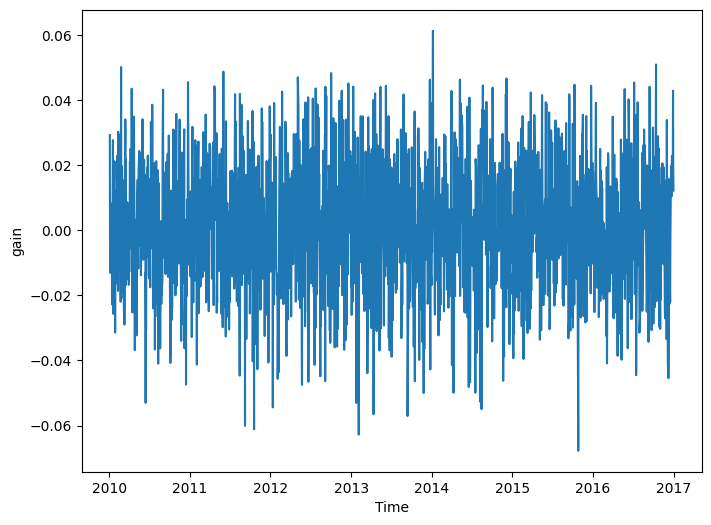

In [ ]:
plt.figure(figsize = (8, 6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

FIGURE 3.6 Daily gain of BEML stock.


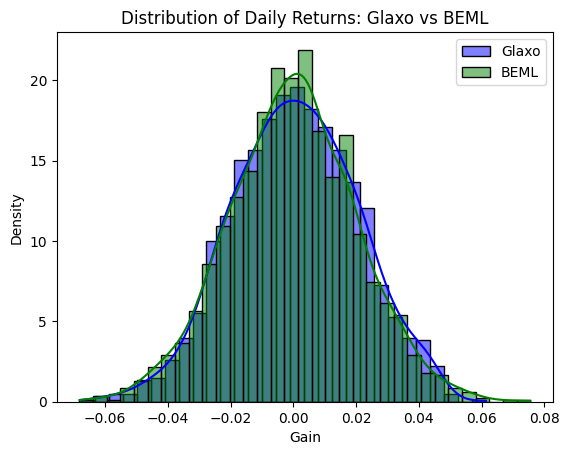

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

# Plotting distribution for both stocks using histplot (with KDE)
sn.histplot(glaxo_df.gain, kde=True, label='Glaxo', color='blue', stat='density')
sn.histplot(beml_df.gain, kde=True, label='BEML', color='green', stat='density')

# Labels and legend
plt.xlabel('Gain')
plt.ylabel('Density')
plt.title('Distribution of Daily Returns: Glaxo vs BEML')
plt.legend()
plt.show()


FIGURE 3.7 Distribution plot of daily gain of BEML and Glaxo stocks.


From the plot shown in Figure 3.7, gain seems to be normally distributed for both the stocks with a mean around 0.00. BEML seems to have a higher variance than Glaxo.

Note: This distribution has a long tail, but we will assume normal distribution for simplicity and discuss the example.

3.7.2 | **Mean** and **Variance**

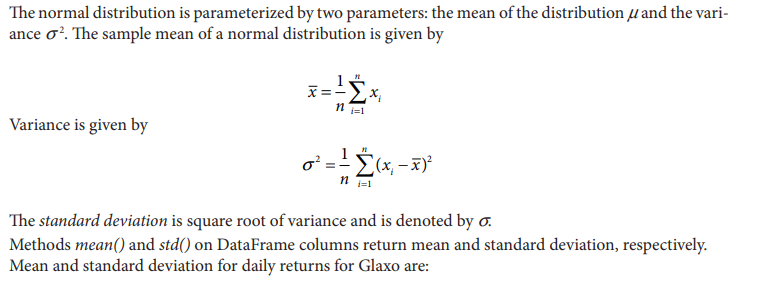

In [ ]:
print("Daily gain of Glaxo")
print("---------------------")
print("Mean: ", round(glaxo_df.gain.mean(), 4))
print("Standard Deviation: ", round(glaxo_df.gain.std(), 4))

Daily gain of Glaxo
---------------------
Mean:  0.0007
Standard Deviation:  0.02


Mean and standard deviation for daily returns for BEML are:


In [ ]:
print("Daily gain of BEML")
print("---------------------")
print("Mean: ", round(beml_df.gain.mean(), 4))
print("Standard Deviation: ", round(beml_df.gain.std(), 4))


Daily gain of BEML
---------------------
Mean:  -0.0001
Standard Deviation:  0.0202


The describe() method of DataFrame returns the detailed statistical summary of a variables

In [ ]:
beml_df.gain.describe()

,gain
count,1825.000000
mean,-0.000103
std,0.020232
min,-0.068168
25%,-0.013857
50%,0.000016
75%,0.013506
max,0.075555


The expected daily rate of return (gain) is around 0% for both stocks. Here variance or standard deviation of gain indicates risk. So, BEML stock has a higher risk as standard deviation of BEML is 2.02%
whereas the standard deviation for Glaxo is 0.02%.

In [ ]:
3.7.3 | Confidence Interval

To find out what is the expected range of return for 95% confidence interval, we need to calculate the values
of gain for two standard deviations away from mean on both sides of the distribution, that is, m ± 2s.
For advanced statistical analysis, we can use Python library scipy.stats. The library contains sub-packages
for analyzing different distributions. For example, methods to analyze normal distribution are given by stats.
norm. The interval() method of stats.norm gives the confidence interval for a normal distribution.
stats.norm.interval() takes three parameters:
1. alpha: It is the interval, for example, 0.9 for 90% confidence interval.
2. loc: It is the location parameter of the distribution. It is mean for normal distribution.
3. scale: It is the scale parameter of the distribution. It is standard deviation for normal distribution

In [ ]:
import numpy as np
from scipy import stats

# Calculate 95% confidence interval
glaxo_df_ci = stats.norm.interval(
    0.95,
    loc=glaxo_df.gain.mean(),
    scale=glaxo_df.gain.std()
)

# Print the result
print("Gain at 95% confidence interval is:", np.round(glaxo_df_ci, 4))


Gain at 95% confidence interval is: [-0.0386  0.0399]


The result returned by the method is a tuple. The first value of the tuple is the leftmost value of the interval and second value is the rightmost value of the interval. For 95% confidence interval, gain of Glaxo
remains between −% and 3.99%.
Returns for BEML for 95% confidence interval is given by

In [ ]:
beml_df_ci = stats.norm.interval(0.95,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())
print("Gain at 95% confidence interval is:", np.round(beml_df_ci, 4))

Gain at 95% confidence interval is: [-0.0398  0.0396]


Hence gain of BEML remains between -3.98% and 3.96% for 95% confidence interval.

3.7.4 | Cumulative Probability Distribution

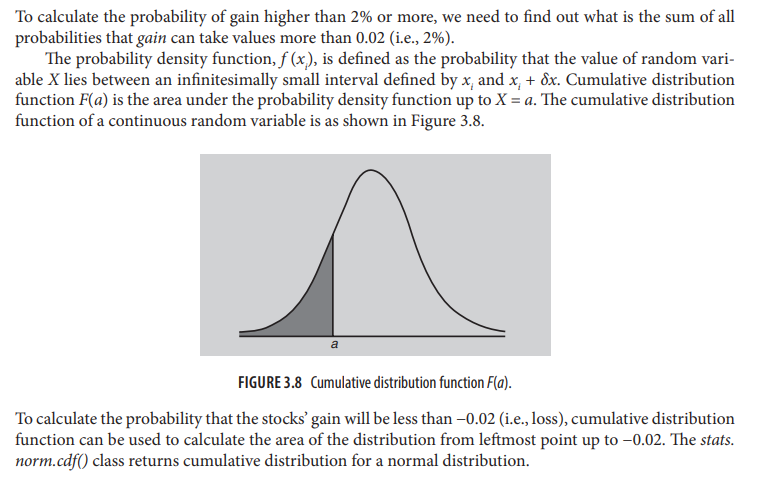

In [ ]:
print("Probability of making 2% loss or higher in Glaxo: ")
stats.norm.cdf(-0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

Probability of making 2% loss or higher in Glaxo: 


np.float64(0.15111261742387144)

In [ ]:
print("Probability of making 2% loss or higher in BEML: ")
stats.norm.cdf(-0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

Probability of making 2% loss or higher in BEML: 


np.float64(0.162698258690205)

Cumulative distribution function value indicates that BEML has 22.1% probability, whereas Glaxo has
only 6.35% probability of making a loss of 2% or higher. Similarly, the probability of making a daily gain
of 2% or higher will be given by the area to the right of 0.02 of the distribution. As stats.norm.cdf() gives
the cumulative area from left, the probability can be computed by subtracting the cumulative distribution function value from 1.

In [ ]:
print("Probability of making 2% gain or higher in Glaxo: ",
1 - stats.norm.cdf(0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std()))
print("Probability of making 2% gain or higher in BEML: ",
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std()))

Probability of making 2% gain or higher in Glaxo:  0.16695451200062217
Probability of making 2% gain or higher in BEML:  0.1602077383826368


The probability of making a gain of 2% or more for Glaxo is 16.69%, whereas it is 16.02% for BEML.

3.9 | HYPOTHESIS TEST

Hypothesis is a claim and the objective of hypothesis testing is to either reject or retain a null hypothesis
(current belief) with the help of data. Hypothesis testing consists of two complementary statements
called null hypothesis and alternative hypothesis. Null hypothesis is an existing belief and alternate hypothesis is what we intend to establish with new evidences (samples).
Hypothesis tests are broadly classified into parametric tests and non-parametric tests. Parametric
tests are about population parameters of a distribution such as mean, proportion, standard deviation,
etc., whereas non-parametric tests are not about parameters, but about other characteristics such as
independence of events or data following certain distributions such as normal distribution.

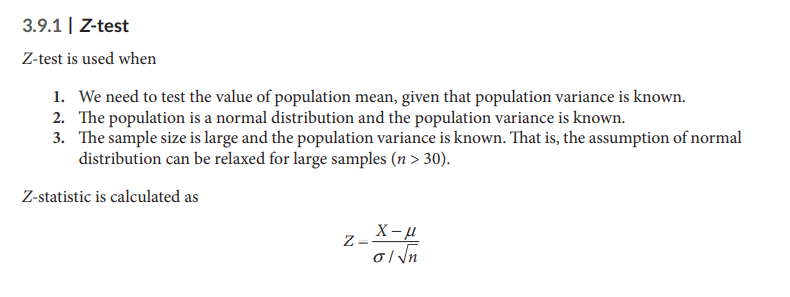

In [4]:
passport_df = pd.read_csv('//content/passport.csv')
passport_df.head(5)

,S.no,Processing_time
0,0,16
1,1,16
2,2,30
3,3,37
4,4,25


In [6]:
print(passport_df.columns)

Index(['S.no', 'Processing_time'], dtype='object')


In [8]:
print(list(passport_df["Processing_time"]))


[16, 16, 30, 37, 25, 22, 19, 35, 27, 32, 34, 28, 24, 35, 24, 21, 32, 29, 24, 35, 28, 29, 18, 31, 28, 33, 32, 24, 25, 22, 21, 27, 41, 23, 23, 16, 24, 38, 26, 28]


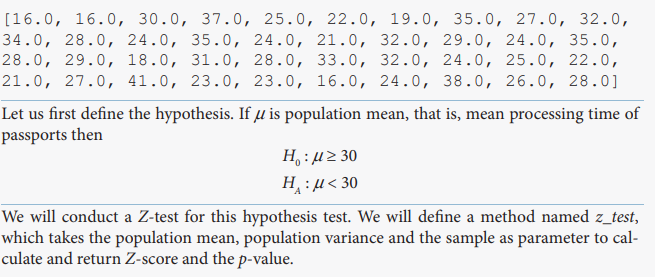

In [10]:
import math
from scipy import stats

def z_test(pop_mean, pop_std, sample):
    z_score = (sample.mean() - pop_mean) / (pop_std / math.sqrt(len(sample)))
    return z_score, stats.norm.cdf(z_score)


In [12]:
z_test(30, 12.5, passport_df["Processing_time"])

(np.float64(-1.4925950555994747), np.float64(0.06777160919961511))

The first value of the result is the Z-statistic value or Z-score and second value is the corresponding p-value. As the p-value is more than 0.05, the null hypothesis is retained. Also, Z-statistic value is higher than –1.64.
The p-value provides us significance of sample evidence. In this example, we see that there is 6.77% probability of observing a random sample at least as extreme as the observed sample. Since 6.77% is greater than the significance value 5%, there is not enough evidence to reject null hypothesis. The null hypothesis is retained and it can be concluded that average
processing time of passports is greater than equal to 30.


3.9.3 | Two-Sample t-Test

A two-sample t-test is required to test difference between two population means where standard deviations are unknown. The parameters are estimated from the samples.

In [21]:
healthdrink_yes_df = pd.read_csv('/content/healthdrink.csv')


In [22]:
healthdrink_yes_df.head(5)

,S.no,height_increase
0,0,5.3
1,1,9.0
2,2,5.7
3,3,5.5
4,4,5.4


In [23]:
healthdrink_yes_df.columns


Index(['S.no', 'height_increase'], dtype='object')

Now read the data from the tab healthdrink_no in healthdrink.xlsx and display first 5 records.


In [26]:
healthdrink_no_df = pd.read_csv('healthdrink.csv')
print(healthdrink_no_df.head(5))


   S.no  height_increase
0     0              5.3
1     1              9.0
2     2              5.7
3     3              5.5
4     4              5.4


We use the following code to display the distribution plots of increase in height separately for drinking health drink and not drinking health drink groups.


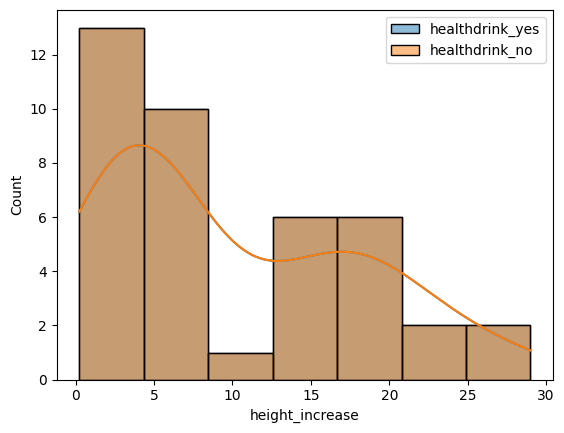

In [28]:
import seaborn as sn
import matplotlib.pyplot as plt

# Plot for healthdrink_yes_df
sn.histplot(healthdrink_yes_df['height_increase'], label='healthdrink_yes', kde=True)

# Plot for healthdrink_no_df
sn.histplot(healthdrink_no_df['height_increase'], label='healthdrink_no', kde=True)

# Display legend
plt.legend()
plt.show()

We can observe from Figure 3.9 that the distribution of increase in height for those who have the health drink has shifted to the right of those who did not have the health drink. But is the difference, as claimed, statistically significant?

The scipy.stats.ttest_ind() method takes two independent samples and returns the test
statistics.

In [29]:
stats.ttest_ind(healthdrink_yes_df['height_increase'],
healthdrink_no_df['height_increase'])

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.float64(78.0))

The probability of the samples belonging to the same distribution is almost 0. This means that the increase in height for those who had health drink is significantly different than those who did not.

In [31]:
breakups_df = pd.read_csv('/content/breakup.csv')
breakups_df.head(5)

,Before_Breakup,After_Breakup
0,470,408
1,354,439
2,496,321
3,496,321
4,351,437


Use the following to display the distribution plots of alcohol consumption separately for
before and after breakups.

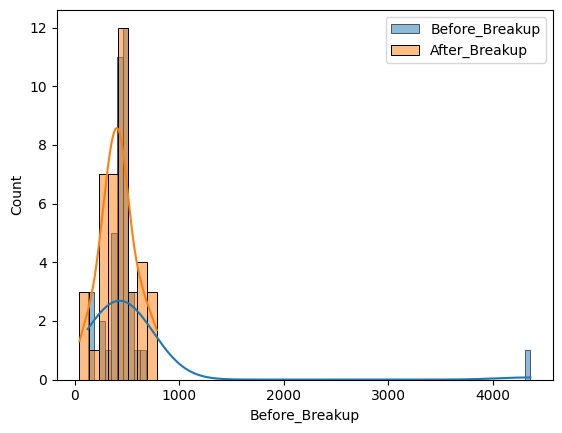

In [33]:
# Plot for Before Breakup alcohol consumption
sn.histplot(breakups_df['Before_Breakup'], label='Before_Breakup', kde=True)

# Plot for After Breakup alcohol consumption
sn.histplot(breakups_df['After_Breakup'], label='After_Breakup', kde=True)

# Display legend
plt.legend()
plt.show()

shows that the distribution of drinking habits before and after breakups are very similar. We can use paired t-test to confirm this. scipy.stats.ttest_rel is used to conduct the paired sample t-test. It takes both related samples as parameters.

In [35]:
from scipy import stats

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(breakups_df['Before_Breakup'], breakups_df['After_Breakup'])

# Output the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if we reject or fail to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: Alcohol consumption is significantly more after the breakup.")
else:
    print("We fail to reject the null hypothesis: No significant difference in alcohol consumption after the breakup.")


T-statistic: 1.0242568209346554
P-value: 0.3120254643710163
We fail to reject the null hypothesis: No significant difference in alcohol consumption after the breakup.


### 3.10 | ANALYSIS OF VARIANCE (ANOVA)

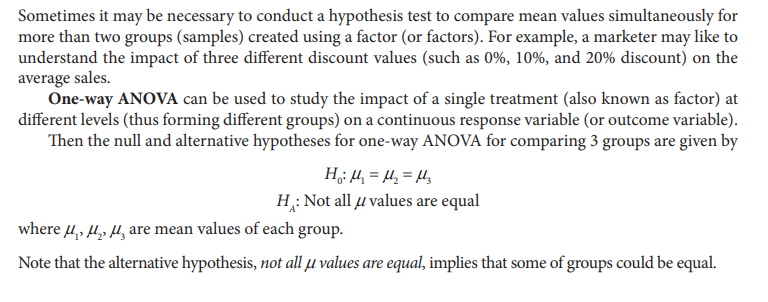

Ms Rachael Khanna the brand manager of ENZO detergent powder at the “one-stop” retail was interested in understanding whether the price discounts have any impact on the sales quantity of ENZO. To test whether the price discounts had any impact, price discounts of 0% (no discount), 10%, and 20% were
given on randomly selected days. The quantity (in kilograms) of ENZO sold in a day under different discount levels is shown in Table 3.1. Conduct a one-way ANOVA to check whether discount had any significant impact on the average sales quantity at a = 0.05

In [48]:
onestop_df = pd.read_csv('/content/onestop.csv')
onestop_df.head(5)

,Discount_0,Discount_10,Discount_20
0,39,34,42
1,32,41,43
2,25,45,44
3,25,39,46
4,37,38,41


In [50]:
print(onestop_df.columns.tolist())


['Discount_0', 'Discount_10', 'Discount_20']


In [51]:
['Discount 0', 'Discount 10', 'Discount 20']


['Discount 0', 'Discount 10', 'Discount 20']

In [52]:
onestop_df.columns = onestop_df.columns.str.strip().str.lower().str.replace(" ", "_")
print(onestop_df.columns.tolist())


['discount_0', 'discount_10', 'discount_20']


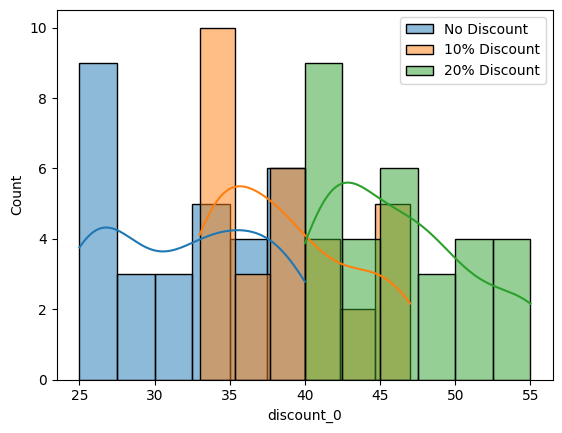

In [53]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.histplot(onestop_df['discount_0'], label='No Discount', kde=True)
sn.histplot(onestop_df['discount_10'], label='10% Discount', kde=True)
sn.histplot(onestop_df['discount_20'], label='20% Discount', kde=True)

plt.legend()
plt.show()


In [54]:
from scipy.stats import f_oneway
f_oneway(onestop_df['discount_0'],
onestop_df['discount_10'],
onestop_df['discount_20'])

F_onewayResult(statistic=np.float64(65.86986401283694), pvalue=np.float64(3.821500669725641e-18))

From the plot, it seems the distributions are not same. It may be by chance. Only a one-way ANOVA test will ensure if they are same or not. The scipy.stats.f_oneway() method conducts one-way ANOVA and returns F-statistics and p-value. If p-value is less than 0.05, the null hypothesis can be rejected and one
can conclude that the mean of each group is not same.

.

.

In [ ]:
CONCLUSION

1. The chapter introduced the basic concepts of distributions, their parameters and how they can be
applied in the real world to solve problems.
2. Some of the distributions we explored are normal distribution, exponential distribution,
binomial, and Poisson distribution and their applications.
3. The objective of hypothesis testing is to either reject or retain an existing claim or belief with the
help of newly collected evidences or samples. The existing belief is called a null hypothesis and a new
claim is called an alternative hypothesis in a hypothesis test.
4. Z-test can be used to test the value of population mean when sample size is large (n > 30) and population variance is known.
5. The t-test is used when the population standard deviation is unknown and is estimated from the
sample.
6. Chi-square tests are hypothesis tests that are used for comparing the observed distribution of data
with expected distribution of the data to decidewhetherthere is any statistically significant difference
between the observed distribution and a theoretical distribution.


THE END